In [ ]:
# Generation of Sample synthetic retail sales dataset

import pandas as pd
import numpy as np

# Generate random dates for transactions
date_rng = pd.date_range(start='2024-01-01', end='2024-06-15', freq='D')

# Sample data categories
categories = ['Electronics', 'Clothing', 'Groceries', 'Furniture', 'Beauty']
customer_types = ['New', 'Returning', 'Loyal']

# Creating the dataset
np.random.seed(42)
data = {
    'Date': np.random.choice(date_rng, size=500),
    'Product_Category': np.random.choice(categories, size=500),
    'Customer_Type': np.random.choice(customer_types, size=500),
    'Sales_Amount': np.random.randint(100, 5000, size=500),
    'Units_Sold': np.random.randint(1, 20, size=500)
}

df = pd.DataFrame(data)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Save to CSV
df.to_csv('/content/synthetic_retail_data.csv', index=False) # This will store the CSV file in Colab's /content/ directory.
# After saving, you can read the CSV file inside Colab:
print(df.head())  # Check the first few rows

# --------------------Sample synthetic retail sales dataset Generated--------------------------Sample synthetic retail sales dataset Generated--------------------------------------


        Date Product_Category Customer_Type  Sales_Amount  Units_Sold
0 2024-04-12           Beauty     Returning          2837          12
1 2024-04-02        Furniture         Loyal           949           5
2 2024-01-15      Electronics     Returning          2209           2
3 2024-04-16           Beauty           New           102          16
4 2024-03-12      Electronics     Returning          4355           5


In [ ]:

# Download the Dataset, If you want to download the dataset to your local machine:
# This will trigger a download prompt in your browser.
from google.colab import files
files.download('/content/synthetic_retail_data.csv')

# ---------------synthetic_retail_data.csv dataset successfully saved in Colab's /content/ directory & the dataset is successfully downloaded to your local machine:-----------------------------



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Let’s structure our project step by step:

# ---------------------------Data Acquisition & Loading----------------------

# Load the Saved Dataset into Pandas
# import pandas as pd
# df = pd.read_csv('/content/synthetic_retail_data.csv')

# After saving, you can read the CSV file inside Colab:
# print(df.head())  # Check the first few rows

# -----------------------------Exploratory Data Analysis (EDA)---------------------------
print(df.info())  # Check data types
print(df.describe())  # Summary statistics
print(df.isnull().sum())  # Missing values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              500 non-null    datetime64[ns]
 1   Product_Category  500 non-null    object        
 2   Customer_Type     500 non-null    object        
 3   Sales_Amount      500 non-null    int64         
 4   Units_Sold        500 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 19.7+ KB
None
                             Date  Sales_Amount  Units_Sold
count                         500    500.000000   500.00000
mean   2024-03-26 16:36:28.800000   2511.520000     9.78400
min           2024-01-01 00:00:00    101.000000     1.00000
25%           2024-02-15 00:00:00   1228.750000     5.00000
50%           2024-04-01 00:00:00   2462.500000    10.00000
75%           2024-05-08 00:00:00   3744.750000    14.00000
max           2024-06-1

In [ ]:
#----------------------------------- Handle missing data:--------------------------------------
df.fillna(method='ffill', inplace=True)  # Forward-fill strategy



<ipython-input-4-2315288723>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward-fill strategy


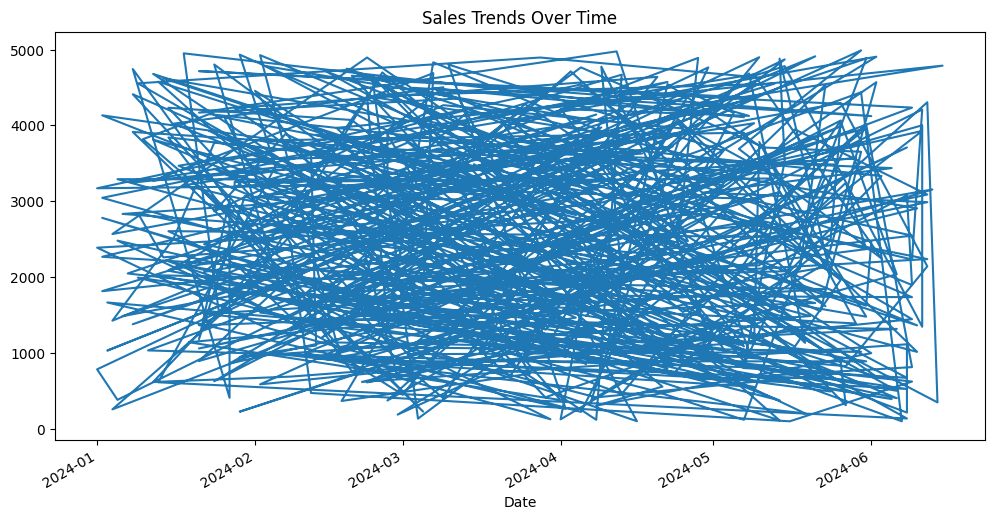

In [ ]:
# -------------------------------Data Visualization (Matplotlib & Seaborn)----------------------------

# Sales Trends Over Time:
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date')['Sales_Amount'].plot(figsize=(12, 6), title="Sales Trends Over Time")
plt.show()



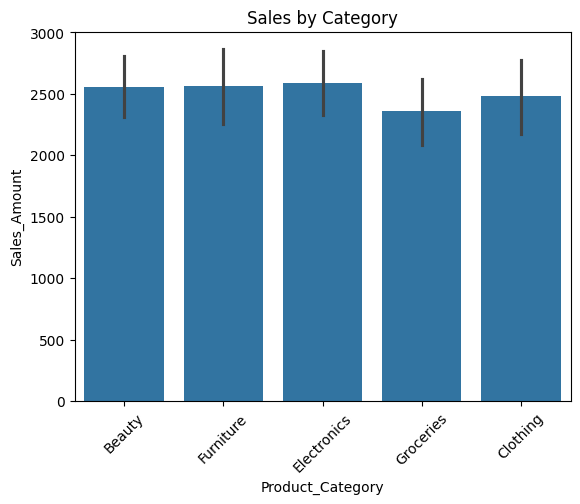

In [ ]:
# Category-wise Sales Distribution:
sns.barplot(x='Product_Category', y='Sales_Amount', data=df)
plt.title("Sales by Category")
plt.xticks(rotation=45)
plt.show()